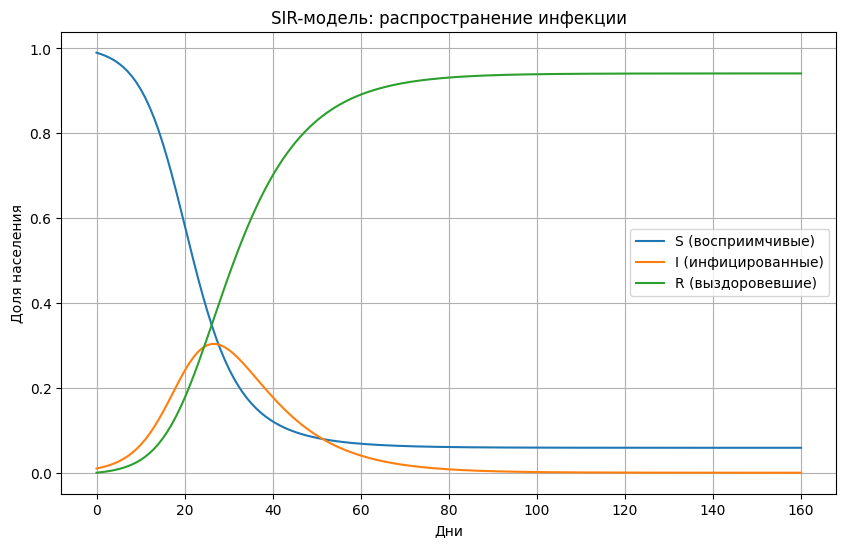

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

beta = 0.3    # коэффициент вероятности заражения
gamma = 0.1   # коэффициент вероятности выздоровления

# S - восприимчивые, I - инфицированные, R - выздоровевшие
S0 = 0.99     # 99% восприимчивых
I0 = 0.01     # 1% инфицированных
R0 = 0.0      # никто не выздоровел
y0 = [S0, I0, R0]

t = np.linspace(0, 160, 160) #временной интервал

# Модель SIR: система дифференциальных уравнений
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I           # S уменьшается из-за заражений
    dIdt = beta * S * I - gamma * I  # I увеличивается из заражений и уменьшается за счёт выздоровлений
    dRdt = gamma * I               # R увеличивается по мере выздоровления
    return [dSdt, dIdt, dRdt]

# Решение системы уравнений
solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T  # транспонируем результат

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='S (восприимчивые)')
plt.plot(t, I, label='I (инфицированные)')
plt.plot(t, R, label='R (выздоровевшие)')
plt.xlabel('Дни')
plt.ylabel('Доля населения')
plt.title('SIR-модель: распространение инфекции')
plt.legend()
plt.grid(True)
plt.show()



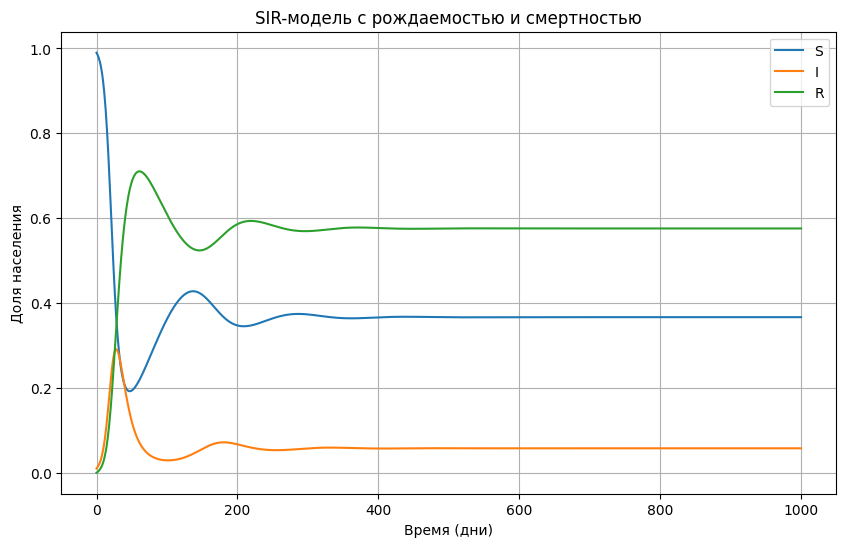

In [6]:


beta = 0.3     # коэффициент заражения
gamma = 0.1    # коэффициент выздоровления
mu = 0.01      # естественная смертность = рождаемость

S0 = 0.99      # доля восприимчивых
I0 = 0.01      # доля инфицированных
R0 = 0.0       # доля выздоровевших
y0 = [S0, I0, R0]


t = np.linspace(0, 160, 160)


def sir_birth_death(y, t, beta, gamma, mu):
    S, I, R = y
    N = S + I + R  # общее население
    dSdt = -beta * S * I + mu * (N - S)        # заражения, рождение, смерть
    dIdt = beta * S * I - gamma * I - mu * I   # инфицирование, выздоровление, смерть
    dRdt = gamma * I - mu * R                  # выздоровление, смерть
    return [dSdt, dIdt, dRdt]

solution = odeint(sir_birth_death, y0, t, args=(beta, gamma, mu))
S, I, R = solution.T


plt.figure(figsize=(10, 6))
plt.plot(t, S, label='S (восприимчивые)')
plt.plot(t, I, label='I (инфицированные)')
plt.plot(t, R, label='R (выздоровевшие)')
plt.xlabel('Время (дни)')
plt.ylabel('Доля населения')
plt.title('SIR-модель с естественной смертностью и рождаемостью')
plt.legend()
plt.grid(True)
plt.show()